In [1]:
import pandas as pd
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
raw_er_admission = pd.read_excel('../data/raw/er_admission.xlsx', sheet_name = 'Data')

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/er_admission.xlsx'

In [12]:
data

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Stay_length,Last_10_mins,Admission_ALL
0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,1.0,1.078947,0.97783,21.0,0.095238,0.058824,78.0,0.0,1.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,1.736842,0.97783,24.0,0.041667,0.000000,202.0,0.0,1.000000
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,234.0,1.0,1.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,239.0,1.0,1.000000
4,1.0,1.0,1.0,0.0,0.0,1.0,5.0,6.0,0.0,1.0,1.763158,0.97783,36.0,0.138889,0.000000,227.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,3.0,7.0,0.0,1.0,1.0,0.0,2.0,6.0,NaN,0.0,1.347826,0.96000,5.0,0.400000,0.000000,234.0,1.0,1.000000
19733,3.0,7.0,0.0,0.0,1.0,1.0,5.0,2.0,0.0,0.0,1.347826,0.96000,5.0,0.400000,0.000000,79.0,0.0,0.000000
19734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6263.000000


## Exploratory Data Analysis

In this section we are going to make Exploratory Data Analysis in order to understand our information, know our data, identify characteristics of each variable, possible errors and calculate descriptive statistics.

In [13]:
data.shape

(19737, 18)

The dataset has 19737 patients and 18 variables of their personal information and data about the admission. Let's see the state of the dataset regarding to null values.

<AxesSubplot:>

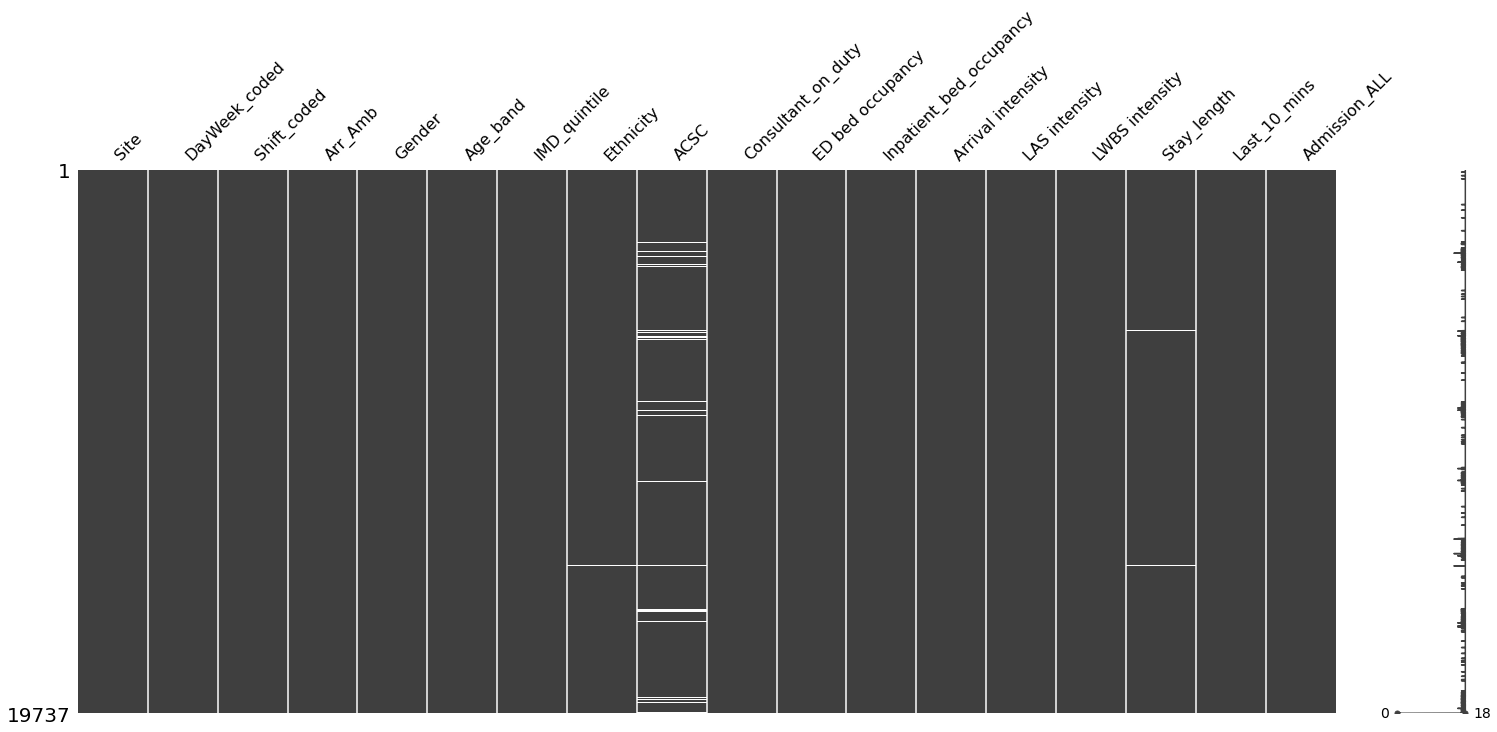

In [19]:
msno.matrix(data)

In [8]:
values_drop = data.isnull().sum(axis = 1) >= 17 
data = data[values_drop == False]
data.shape

(19734, 18)

In [9]:
data.isnull().sum(axis = 0)

Site                         0
DayWeek_coded                0
Shift_coded                  0
Arr_Amb                      0
Gender                       0
Age_band                     0
IMD_quintile                 0
Ethnicity                   13
ACSC                       884
Consultant_on_duty           0
ED bed occupancy             0
Inpatient_bed_occupancy      0
Arrival intensity            0
LAS intensity                0
LWBS intensity               0
Stay_length                 21
Last_10_mins                 8
Admission_ALL                0
dtype: int64

Rows with information for just one variable or less were removed due to lack of data. As we can appreciate, most of the variables has no null values which is good, except for ACSC (Diagnostic code indicating presentation as a result of an ambulatory care sensitive condition), Stay_length and Ethnicity.

## Correlation

<AxesSubplot:>

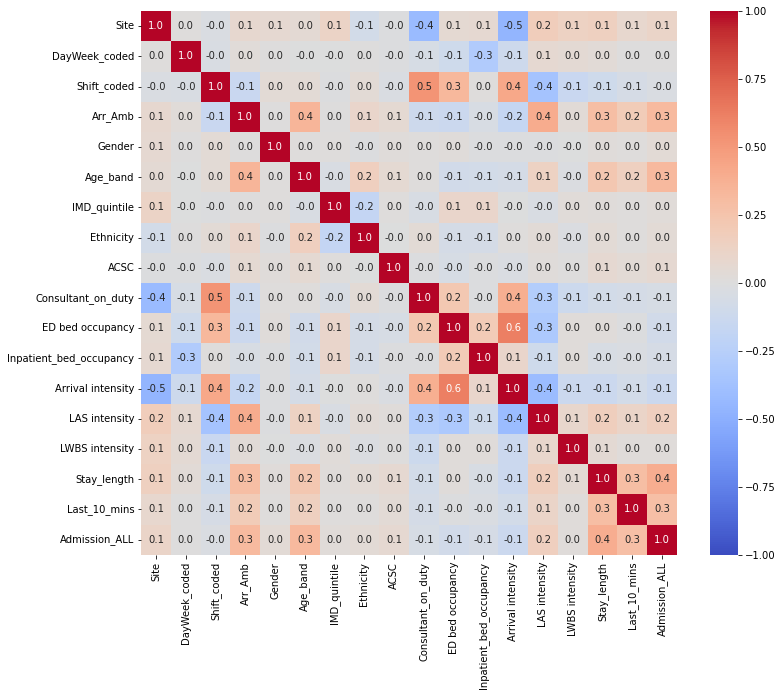

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, cmap="coolwarm", fmt='.1f',)

We found some significant linear correlation between some variables, the strongest positivesare between:
 - ED bed occupancy and arrival intensity (0.6): this relation makes sense, because i expect that with higher number of patients arriving the number of occupied bed in the emergency department will increase.
 - Consultant on duty and Shift coded (0.5): this shows us that is more likely to find a consultant in duty during day.
 
And the strongest negative linear correlation are between:
- Arrival intensity and site (0.5): this indicates that higher patients arrival occurs in smaller sites number, but it is important to remember that sites is the number given to a location, so a relation between this number does not have an impact.